# 6- Nested Gage R&R Analysis

## 6.1- Destructive Gage R&R analysis (no tolerance example)

### 6.1.1- Introduction

A 3D manufacturing process generates a part with a target tensile strength of 60 MPa. The team of operators has proceeded to measure a total of 10 parts each in order to analyze the measurement system.

### 6.1.2- STEP 1: Get the measurement

In [1]:
from pypetb import Repeatability
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#set seaborn style to improve the figure sight
sns.set()

# Load measurement dataset
url = 'https://raw.githubusercontent.com/jgherruzo/myFreeDatasets/main/3d_strength.csv' # noqa
df=pd.read_csv(url,sep=',')
print(df.info()) # In order to check column names 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   Operador    90 non-null     object 
 2   Batch       90 non-null     int64  
 3   Valor       90 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.9+ KB
None


### 6.1.3- STEP 2: Make all calculation calling .RSolve()

In [2]:
#Build up the model
dict_key={'1':'Batch','2':'Valor'}
RModel=Repeatability.RNumeric(
    mydf_Raw=df,
    mydict_key=dict_key
    )
#Solve it
RModel.RSolve()
#Check the calculation
print(RModel.getLog())

Model is created
== DATASET EVALUATION ==
Trials: 3
Piezes: 30
== CALCULATION ==
Total data: 90
Max. measured value: 75.2074
Min. measured value: 42.8950
Avg. measured value: 60.0438
Avg. Control limits
UCL: 80.9243
LCL: 39.1634
Avg. Range measured: 11.1066
Range Control limits
UCL: 36.2742
LCL: 0.0000
Sum of deviation by part: 572.316415
Total Part Sum of deviation: 1716.949244
Total squared deviation: 4277.523234
Equipment squared deviation: 2560.573990



### 6.1.4- STEP 3: Check Anova Result

Anova calculation is implemented into other python package. The only different
here is that result is obtained as pandas dataframe and each parameter could
be accesed using its column and index for further calculations

In [3]:
df_Result=RModel.RAnova()
#Checking Anova table
print(df_Result)
#accesing one individual value
print(f"Degree of freedom for part: {df_Result['DF'].loc['Part']}")

                       DF           SS         MS
Source of variability                            
Part                   29  1716.949244  59.205146
Repeatability with     60  2560.573990  42.676233
Repeatability without  60  2560.573990  42.676233
Total                  89  4277.523234        NaN
Degree of freedom for part: 29


### 6.1.5- STEP 4: Variance table

Table that summarize the impact of each parameter to the variance.
It helps a lot to find where the effort must be focused

In [4]:
df_Result=RModel.R_varTable()
#Checking var. table
print(df_Result)
#accesing one individual value
print('\nRepeatability RESULT:\n-------------------')

dbl_RnR=df_Result['% Contribution'].loc['Gage Repeatability']
print(f"Total Gage R&R: {dbl_RnR:.3f}")
if dbl_RnR<1:
    print('<1% --> Acceptable measurement system')
elif dbl_RnR>=1 and dbl_RnR<=9:
    print(
        '1-9%--> It may be acceptable depending on application and cost'
        )
else:
    print(
        '>9% --> Unacceptable measurement system, it must be improved'
        )

                     Variance  % Contribution
Source                                       
Gage Repeatability  42.676233       68.379036
Part to Part        19.735049       31.620964
Total variation     62.411282      100.000000

Repeatability RESULT:
-------------------
Total Gage R&R: 68.379
>9% --> Unacceptable measurement system, it must be improved


### 6.1.6- STEP 5: Standard Deviation table

Table that summarize the impact of each parameter to the standard deviation.
It helps a lot to find where the effort must be focused

In [5]:
df_Result=RModel.R_SDTable()
#Checking sd table
print(df_Result)
#accesing one individual value
print('\nAutomotive Industry Action Group (AIAG) measurement system assessment:\n-------------------')

dbl_R=df_Result['% Study Var'].loc['Gage Repeatability']
print(f"Total Gage Repeatability factor: {dbl_R:.3f}")
if dbl_R<10:
    print('<10% --> Acceptable measurement system')
elif dbl_R>=10 and dbl_R<=30:
    print(
        '10-30%--> It may be acceptable depending on application and cost'
        )
else:
    print(
        '>30% --> Unacceptable measurement system, it must be improved'
        )

                    StdDev (SD)  StudyVar (6*SD)  % Study Var
Source                                                       
Gage Repeatability     6.532705        39.196229    82.691618
Part to Part           4.442415        26.654488    56.232521
Total variation        7.900081        47.400487   100.000000

Automotive Industry Action Group (AIAG) measurement system assessment:
-------------------
Total Gage Repeatability factor: 82.692
>30% --> Unacceptable measurement system, it must be improved


### 6.1.7- STEP 6: Check the final report

This figure is a mix of chart that will help to find where to be focused in case of being out the recommended limits

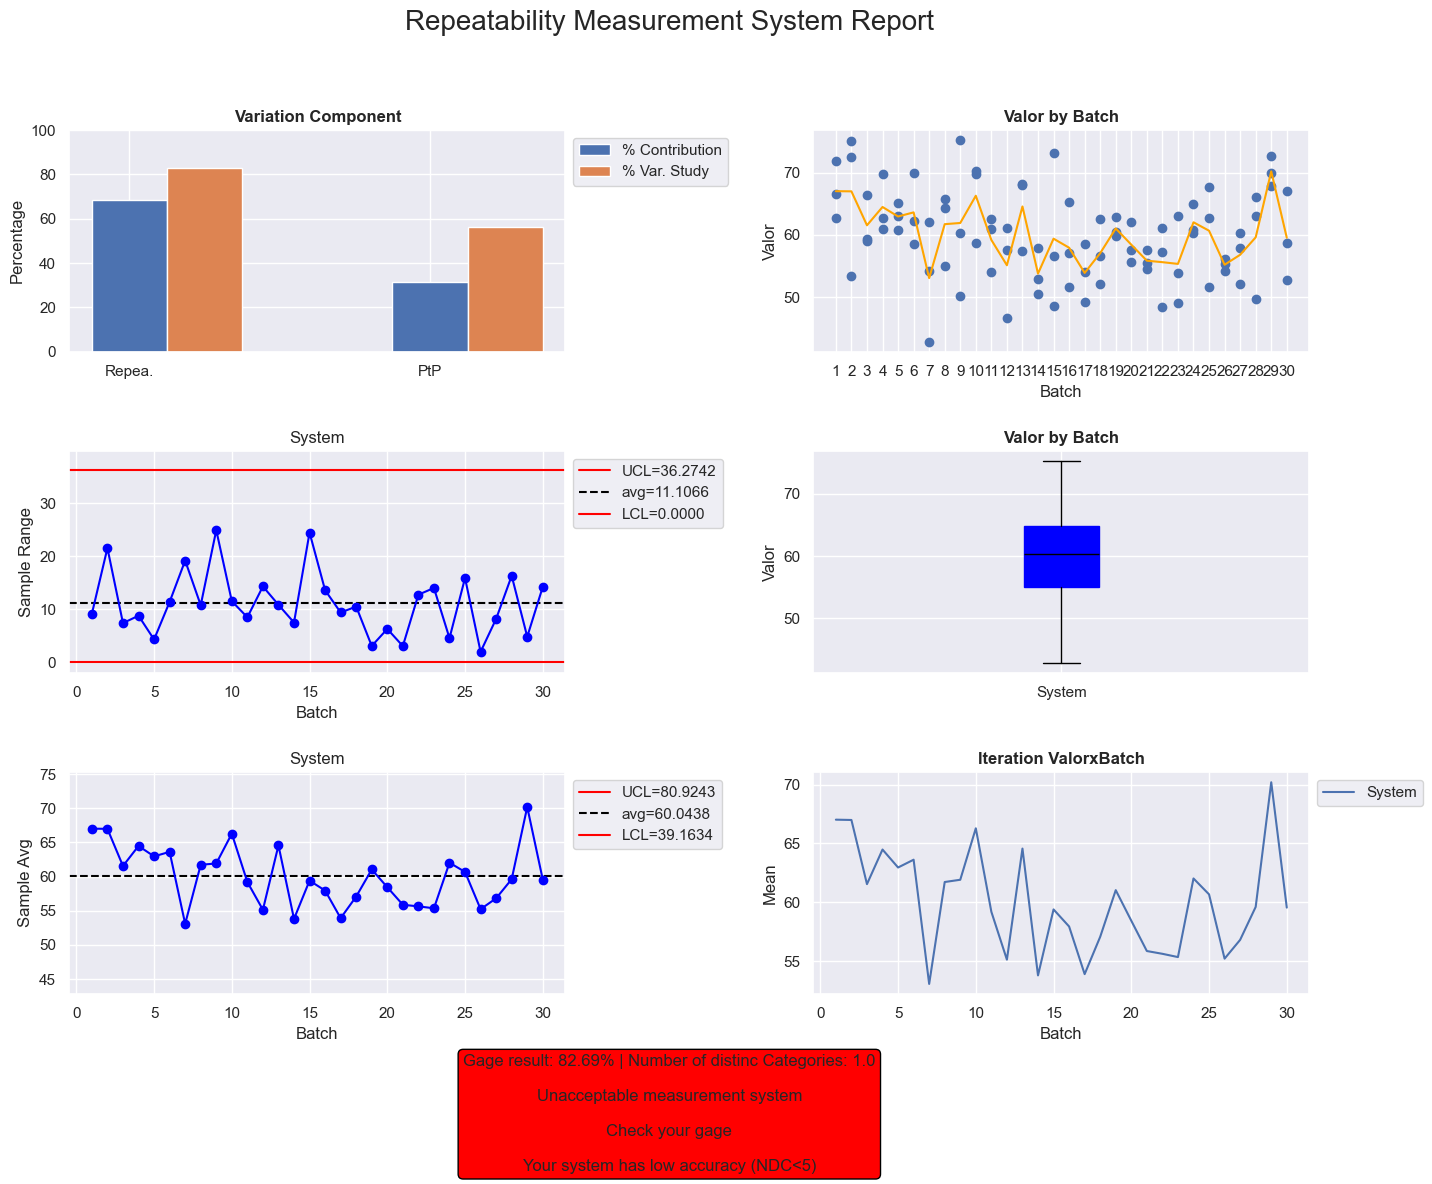

In [6]:
call=RModel.R_Report()
plt.show()